In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage as sk

In [36]:
def load_imgs(path: str | Path) -> np.ndarray:
    """A generator that yields images from a directory.
    """
    p = Path(path)
    for f in p.iterdir():
        if f.suffix == ".jpg" or f.suffix == ".png":
            yield cv2.imread(str(f))[:,:,::-1]


def calc_psnr(img1: np.ndarray, img2: np.ndarray) -> float:
    """Calculate the PSNR between two images.
    """
    assert img1.shape == img2.shape and img1.dtype == img2.dtype
    m, n = img1.shape[:2]
    mse = np.mean((img1 - img2) ** 2) / (m*n)
    return 20 * np.log10(255.0 / np.sqrt(mse))


def calc_ssim(img1: np.ndarray, img2: np.ndarray) -> float:
    """Calculate the SSIM between two images.
    """
    assert img1.shape == img2.shape and img1.dtype == img2.dtype
    return sk.metrics.structural_similarity(img1, img2, channel_axis=2)



def filter_guassian_blur(img) -> np.ndarray:
    """Inverse Gaussian blur on an image.
    """
    return img


def filter_gaussian_noise(img) -> np.ndarray:
    """Inverse Gaussian noise on an image.
    """
    return img


def filter_motion_blur(img) -> np.ndarray:
    """Inverse motion blur on an image.
    """
    return img


def filter_salt_pepper_noise(img) -> np.ndarray:
    """Inverse salt and pepper noise on an image.
    """
    return img


def filter_speckle_noise(img) -> np.ndarray:
    """Inverse speckle noise on an image.
    """
    return img


def evaluate(blur_type: str = None, data_folder: str = "../data/stage1/") -> None:
    """Evaluate all denoising algorithms

    Parameters
    ----------
    blur_type : str
        The type of blur to evaluate. If None, all types are evaluated.
    data_folder : str
        The path to the data folder.

    Returns
    -------
    gblur_psnr : float
    gblur_ssim : float
    motion_psnr : float
    motion_ssim : float
    sp_psnr : float
    sp_ssim : float
    gnoise_psnr : float
    gnoise_ssim : float
    speckle_psnr : float
    speckle_ssim : float
    """

    goals = {
        "gaussian_blur": (26.5, 0.65), # psnr, ssim
        "gaussian_noise": (19.5, 0.60),
        "motion_blur": (27.5, 0.70),
        "sp_noise": (26.5, 0.90),
        "speckle_noise": (20.0, 0.65)
    }
    funcs = {
        "gaussian_blur": filter_guassian_blur,
        "gaussian_noise": filter_gaussian_noise,
        "motion_blur": filter_motion_blur,
        "sp_noise": filter_salt_pepper_noise,
        "speckle_noise": filter_speckle_noise
    }

    def eval(img1, img2):
        return calc_psnr(img1, img2), calc_ssim(img1, img2)
    
    def print_result(blur_type, psnr, ssim, psnr_goal, ssim_goal):
        if psnr > psnr_goal and ssim > ssim_goal:
            print(f"{blur_type}: PASS")
        else:
            print(f"{blur_type}: FAIL")
            print(f"\tGoal: PSNR={psnr_goal:.2f}, SSIM={ssim_goal:.2f}")
            print(f"\tActual: PSNR={psnr:.2f}, SSIM={ssim:.2f}")

    imgs_truth = list(load_imgs(data_folder + "input_imgs"))
    if blur_type is None:
        blur_types = ["gaussian_blur", "gaussian_noise", "motion_blur", "sp_noise", "speckle_noise"]
    else:
        blur_types = [blur_type]
    
    for blur_type in blur_types:
        imgs_test = list(load_imgs(data_folder + blur_type))
        psnr = 0
        ssim = 0
        for img_truth, img_test in zip(imgs_truth, imgs_test):
            img_test = funcs[blur_type](img_test)
            a, b = eval(img_truth, img_test)
            psnr += a
            ssim += b
        psnr /= len(imgs_truth)
        ssim /= len(imgs_truth)

        psnr_goal, ssim_goal = goals[blur_type]
        print_result(blur_type, psnr, ssim, psnr_goal, ssim_goal)

gaussian_blur: FAIL
	Goal: PSNR=26.50, SSIM=0.65
	Actual: PSNR=88.92, SSIM=0.56


In [17]:
imgs_truth = list(load_imgs("../data/stage1/input_imgs/"))
imgs_gaussian = list(load_imgs("../data/stage1/gaussian_blur/"))

In [25]:
evaluate()

TypeError: 'int' object is not callable

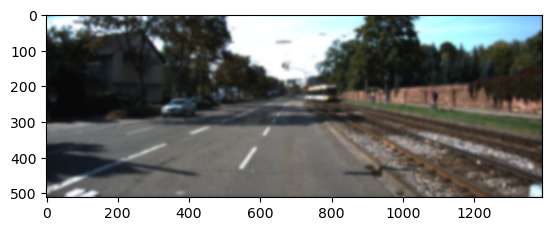

In [12]:
plt.imshow(imgs_gaussian[0])